In [1]:
# import packages and alias
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib as plt # data visualization
import datetime as dt # date time

In [2]:
# read_csv function to read the required CSV file
daily_activity = pd.read_csv("D:\Prepinsta\Week 8\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv")

#### 1. Data cleaning and manipulation

##### Steps

1. Observe and familiarize with data

2. Check for null or missing values

3. Perform sanity check of data

Previewing using head function to show the first 10 rows of daily_activity to familiarise with the data.

In [3]:
# preview first 10 rows with all columns
daily_activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


Then, finding out whether there is any null or missing values in daily_activity.

In [4]:
# obtain the # of missing data points per column
missing_values_count = daily_activity.isnull().sum()

# look at the # of missing points in all columns
missing_values_count[:]

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

Finding out the basic information of daily_activity:
* no. of rows and columns
* name of columns
* type of value

In [5]:
# show basic information of data
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

Counting the unique ID and to confirm whether data set has 30 IDs.

In [6]:
# count distinct value of "Id"
unique_id = len(pd.unique(daily_activity["Id"]))
  
print("# of unique Id: " + str(unique_id))

# of unique Id: 33


The following data manipulation is performed:

1. Convert *ActivityDate* to ```datatime64``` dtype.

2. Convert format of *ActivityDate* to ```yyyy-mm-dd```.

3. Create new column *DayOfTheWeek* by separating the date into day of the week for further analysis.

4. Create new column *TotalMins* being the sum of *VeryActiveMinutes*, *FairlyActiveMinutes*, *LightlyActiveMinutes* and *SedentaryMinutes*.

5. Create new column *TotalHours* by converting new column in #4 to number of hours.

6. Rearrange and rename columns.

In [7]:
# convert "ActivityDate" to datatime64 dtype and format to yyyy-mm-dd
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format="%m/%d/%Y")

# re-print information to confirm
daily_activity.info()

# print the first 5 rows of "ActivityDate" to confirm
daily_activity["ActivityDate"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

0   2016-04-12
1   2016-04-13
2   2016-04-14
3   2016-04-15
4   2016-04-16
Name: ActivityDate, dtype: datetime64[ns]

In [8]:
#r create new list of rearranged columns
new_cols = ['Id', 'ActivityDate', 'DayOfTheWeek', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalExerciseMinutes', 'TotalExerciseHours', 'Calories']

# reindex function to rearrange columns based on "new_cols"
df_activity = daily_activity.reindex(columns=new_cols)

# print 1st 5 rows to confirm
df_activity.head(5)

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


Creating new column by separating the date into day of the week for further analysis.

In [9]:
# create new column "day_of_the_week" to represent day of the week 
df_activity["DayOfTheWeek"] = df_activity["ActivityDate"].dt.day_name()

# print 1st 5 rows to confirm
df_activity["DayOfTheWeek"].head(5)

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: DayOfTheWeek, dtype: object

In [10]:
# rename columns
df_activity.rename(columns = {"Id":"id", "ActivityDate":"date", "DayOfTheWeek":"day_of_the_week", "TotalSteps":"total_steps", "TotalDistance":"total_dist", "TrackerDistance":"track_dist", "LoggedActivitiesDistance":"logged_dist", "VeryActiveDistance":"very_active_dist", "ModeratelyActiveDistance":"moderate_active_dist", "LightActiveDistance":"light_active_dist", "SedentaryActiveDistance":"sedentary_active_dist", "VeryActiveMinutes":"very_active_mins", "FairlyActiveMinutes":"fairly_active_mins", "LightlyActiveMinutes":"lightly_active_mins", "SedentaryMinutes":"sedentary_mins", "TotalExerciseMinutes":"total_mins","TotalExerciseHours":"total_hours","Calories":"calories"}, inplace = True)

# print column names to confirm
print(df_activity.columns.values)
df_activity.head(5)

['id' 'date' 'day_of_the_week' 'total_steps' 'total_dist' 'track_dist'
 'logged_dist' 'very_active_dist' 'moderate_active_dist'
 'light_active_dist' 'sedentary_active_dist' 'very_active_mins'
 'fairly_active_mins' 'lightly_active_mins' 'sedentary_mins' 'total_mins'
 'total_hours' 'calories']


,id,date,day_of_the_week,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


Creating new column *total_mins* being the sum of total time logged.

In [11]:
# create new column "total_mins" containing sum of total minutes.
df_activity["total_mins"] = df_activity["very_active_mins"] + df_activity["fairly_active_mins"] + df_activity["lightly_active_mins"] + df_activity["sedentary_mins"]
df_activity["total_mins"].head(5)

0    1094
1    1033
2    1440
3     998
4    1040
Name: total_mins, dtype: int64

Creating new column by converting *total_mins*  to number of hours.

In [12]:
# create new column *total_hours* by converting to hour and round float to two decimal places
df_activity["total_hours"] = round(df_activity["total_mins"] / 60)

# print 1st 5 rows to confirm
df_activity["total_hours"].head(5)

0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
Name: total_hours, dtype: float64

Data cleaning and manipulation is completed. Hence, data is now ready to be analysed. 

***

# 2 ANALYZE

#### 4.1 Perform calculations

Pulling the statistics of df_activity for analysis:
* count - no. of rows
* mean (average)
* std (standard deviation)
* min and max
* percentiles 25%, 50%, 75%

In [13]:
# pull general statistics
df_activity.describe()

,id,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1218.753191,20.313830,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,265.931767,4.437283,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,989.750000,16.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1440.000000,24.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1440.000000,24.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,24.000000,4900.000000


#  3. SHARE

In this step, we are creating visualizations and communicating our findings based on our analysis.

####  Data Visualisation and Findings

In [14]:
import plotly.express as px
import pandas as pd

# Assuming df_activity is your DataFrame containing the data

# Define the order of the days of the week
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Create a histogram using Plotly Express
fig = px.histogram(df_activity, x="day_of_the_week",
                   title="No. of times users logged in app across the week",
                   labels={"day_of_the_week": "Day of the week", "count": "Frequency"},
                   color_discrete_sequence=["lightskyblue"],
                   nbins=7,
                   category_orders={"day_of_the_week": day_order})  # Specify the category order

# Update layout for better aesthetics
fig.update_layout(
    xaxis=dict(title="Day of the week"),
    yaxis=dict(title="Frequency"),
    bargap=0.05,
    template="plotly_white"
)

# Show the interactive plot
fig.show()


In [15]:
import plotly.express as px
import pandas as pd

# Assuming df_activity is your DataFrame containing the data

# Create a scatter plot using Plotly Express
fig = px.scatter(df_activity, x="total_steps", y="calories",
                 title="Calories burned for every step taken",
                 labels={"total_steps": "Steps taken", "calories": "Calories burned"},
                 color="calories",
                 color_continuous_scale="Spectral")

# Add annotations and visuals
median_calories = 2303
median_steps = 7637

fig.add_vline(x=median_steps, line_dash="dash", line_color="blue", annotation_text="Median steps",
              annotation_position="top left")

fig.add_hline(y=median_calories, line_dash="dash", line_color="red", annotation_text="Median calories burned",
              annotation_position="bottom right")

# Update layout for better aesthetics
fig.update_layout(
    xaxis_title="Steps taken",
    yaxis_title="Calories burned",
    coloraxis_colorbar=dict(title="Calories", tickvals=[df_activity["calories"].min(), df_activity["calories"].max()]),
    template="plotly_white"
)

# Show the interactive plot
fig.show()


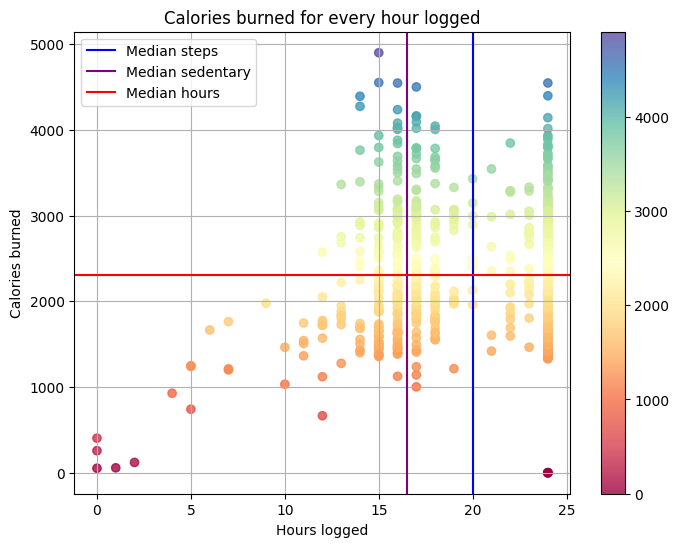

In [16]:
# import matplotlib package
import matplotlib.pyplot as plt

# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # Specify size of the chart
plt.scatter(df_activity.total_hours, df_activity.calories, 
            alpha = 0.8, c = df_activity.calories, 
            cmap = "Spectral")

# adding annotations and visuals
median_calories = 2303
median_hours = 20
median_sedentary = 991 / 60

plt.colorbar(orientation = "vertical")
plt.axvline(median_hours, color = "Blue", label = "Median steps")
plt.axvline(median_sedentary, color = "Purple", label = "Median sedentary")
plt.axhline(median_calories, color = "Red", label = "Median hours")
plt.xlabel("Hours logged")
plt.ylabel("Calories burned")
plt.title("Calories burned for every hour logged")
plt.legend()
plt.grid(True)
plt.show()

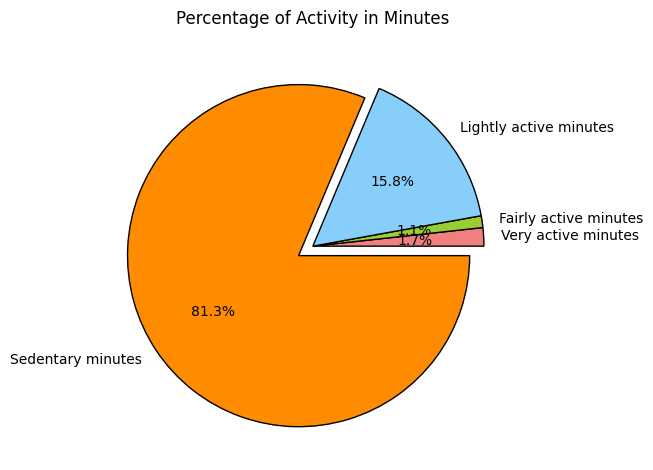

In [17]:
# import packages
import matplotlib.pyplot as plt
import numpy as np

# calculating total of individual minutes column
very_active_mins = df_activity["very_active_mins"].sum()
fairly_active_mins = df_activity["fairly_active_mins"].sum()
lightly_active_mins = df_activity["lightly_active_mins"].sum()
sedentary_mins = df_activity["sedentary_mins"].sum()

# plotting pie chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["lightcoral", "yellowgreen", "lightskyblue", "darkorange"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

In [18]:
import plotly.graph_objects as go
import pandas as pd

# Assuming daily_activity is your DataFrame containing the data

labels = ['Very Active Minutes', 'Fairly Active Minutes', 'Lightly Active Minutes', 'Inactive Minutes']
counts = daily_activity[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].mean()
colors = ['gold', 'lightgreen', 'pink', 'blue']

fig = go.Figure(data=[go.Pie(labels=labels, values=counts)])
fig.update_layout(title_text='Total Active Minutes')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='black', width=2)))
fig.show()


In [19]:
fig = px.scatter(daily_activity, x='Calories', y='TotalSteps', size='VeryActiveMinutes', trendline='ols',
                 title = 'Relationship between Calories and Total Steps'
                )
fig.show()

In [20]:
daily_activity['day'] = daily_activity['ActivityDate'].dt.day_name()
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [21]:


# Assuming daily_activity is your DataFrame containing the data

# Define the order of the days of the week
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Calculate the counts of sedentary minutes for each day
day_counts = daily_activity["day"].value_counts().reindex(day_order)

# Extract the labels (days) and sedentary minutes counts
labels = day_counts.index
counts = day_counts.values

# Define colors for the pie chart
colors = ['gold', 'lightgreen', 'pink', 'blue', 'skyblue', 'cyan', 'orange']

# Create a pie chart using Plotly
fig = go.Figure(data=[go.Pie(labels=labels, values=counts, marker=dict(colors=colors), direction="clockwise")])

# Update layout for better aesthetics
fig.update_layout(
    title="Inactive Minutes Daily",
    title_x=0.5,  # Center the title
    showlegend=False,  # Hide legend for better layout
    margin=dict(l=20, r=20, t=50, b=20),  # Adjust margins for better layout
    font=dict(family="Arial, sans-serif", size=14, color="black"),  # Set font properties
    annotations=[dict(text="Total: " + str(sum(counts)), x=0.5, y=-0.15, showarrow=False, font=dict(size=16))]  # Add total annotation
)

# Show the interactive pie chart
fig.show()


In [22]:
calories = daily_activity["day"].value_counts()
label = calories.index
counts = daily_activity["Calories"]
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Calories Burned Daily')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

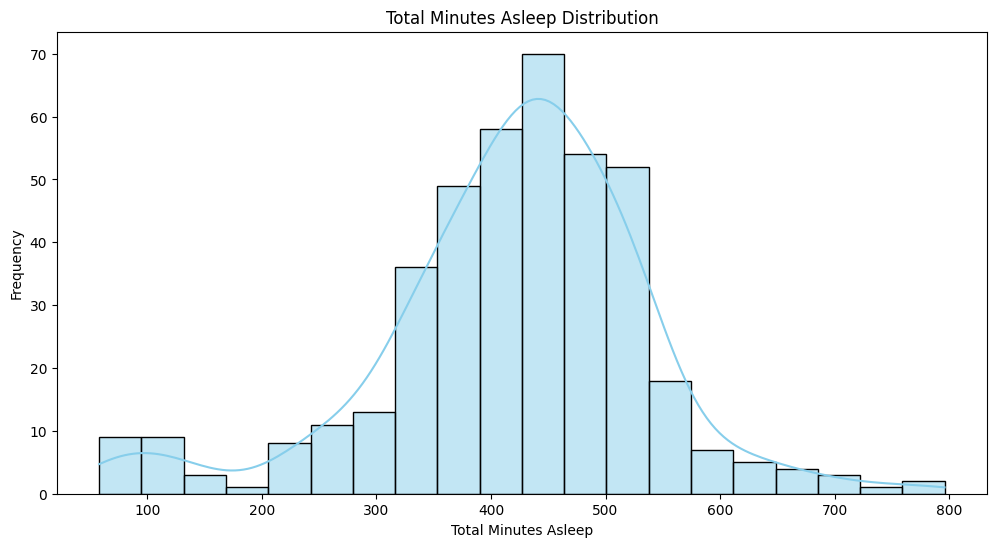

In [23]:

import seaborn as sns

# Load sleep data into a DataFrame
sleep_data = pd.read_csv('D:\Prepinsta\Week 8\Fitabase Data 4.12.16-5.12.16\sleepDay_merged.csv')

# Convert date/time columns to datetime data type
sleep_data['SleepDay'] = pd.to_datetime(sleep_data['SleepDay'])

# Visualize typical sleep patterns
plt.figure(figsize=(12, 6))
sns.histplot(sleep_data['TotalMinutesAsleep'], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title('Total Minutes Asleep Distribution')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Frequency')
plt.show()




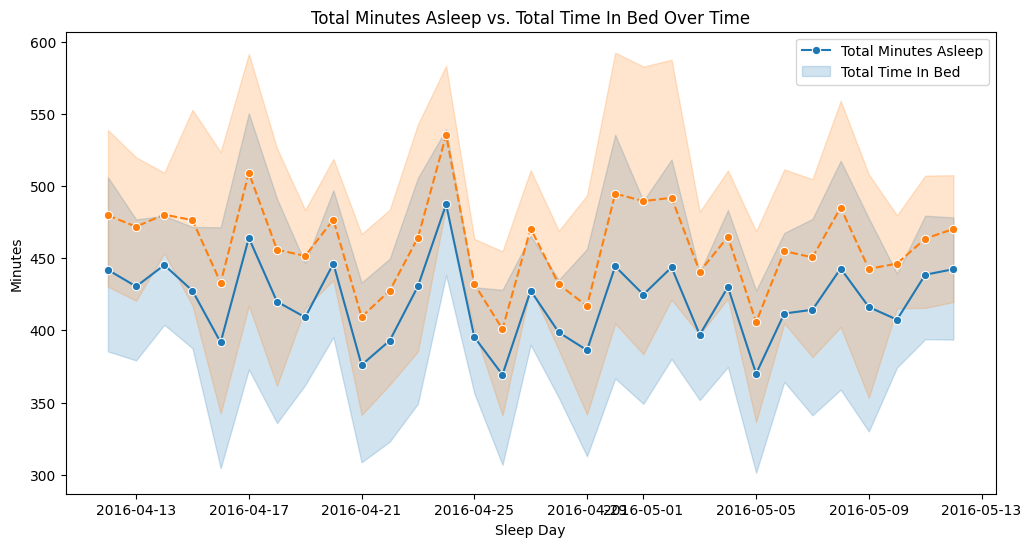

In [24]:
# Visualize sleep duration and quality over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='SleepDay', y='TotalMinutesAsleep', data=sleep_data, marker='o', linestyle='-')
sns.lineplot(x='SleepDay', y='TotalTimeInBed', data=sleep_data, marker='o', linestyle='--')
plt.title('Total Minutes Asleep vs. Total Time In Bed Over Time')
plt.xlabel('Sleep Day')
plt.ylabel('Minutes')
plt.legend(['Total Minutes Asleep', 'Total Time In Bed'])
plt.show()



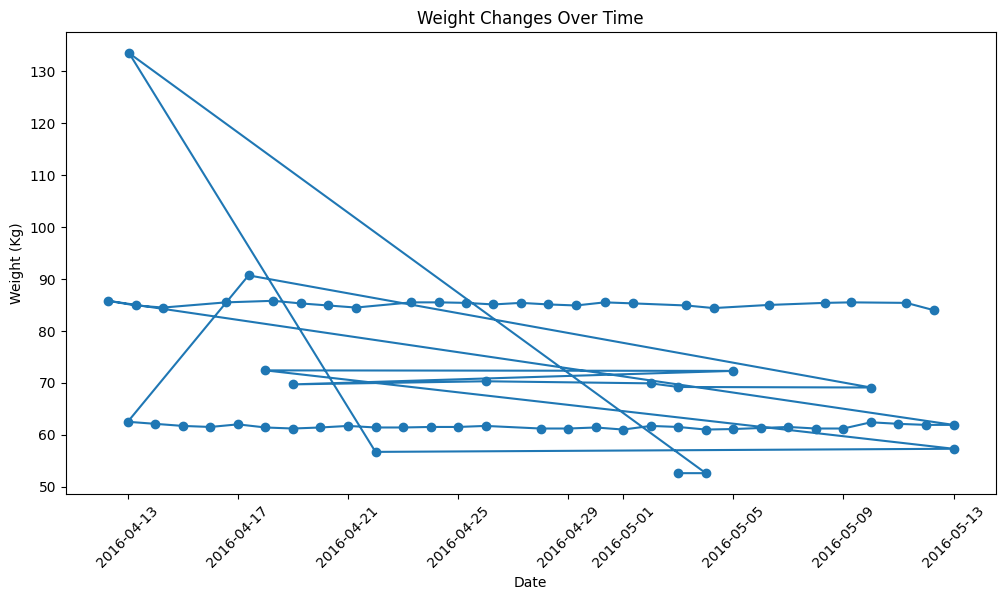

In [28]:
# Load weight log data into a DataFrame
weight_log_data = pd.read_csv('D:\Prepinsta\Week 8\Fitabase Data 4.12.16-5.12.16\weightLogInfo_merged.csv')

# Convert date column to datetime data type
weight_log_data['Date'] = pd.to_datetime(weight_log_data['Date'])

# Visualize weight changes over time
plt.figure(figsize=(12, 6))
plt.plot(weight_log_data['Date'], weight_log_data['WeightKg'], marker='o')
plt.title('Weight Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Weight (Kg)')
plt.xticks(rotation=45)
plt.show()



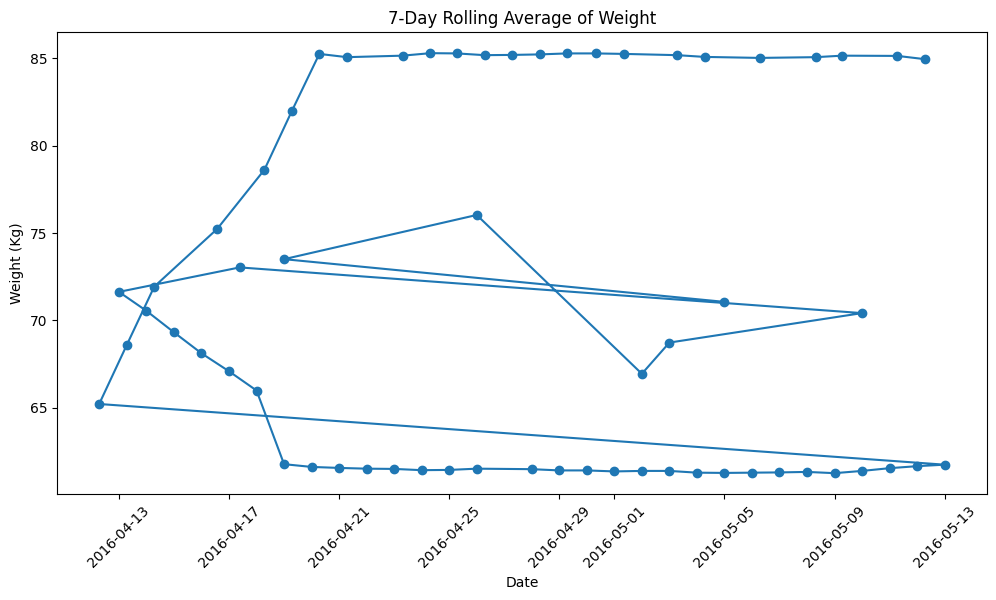

In [30]:
# Analyze trends and patterns in weight fluctuations
# Calculate rolling averages for smoother visualization
weight_log_data['WeightKg_7d_avg'] = weight_log_data['WeightKg'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(weight_log_data['Date'], weight_log_data['WeightKg_7d_avg'], marker='o')
plt.title('7-Day Rolling Average of Weight')
plt.xlabel('Date')
plt.ylabel('Weight (Kg)')
plt.xticks(rotation=45)
plt.show()




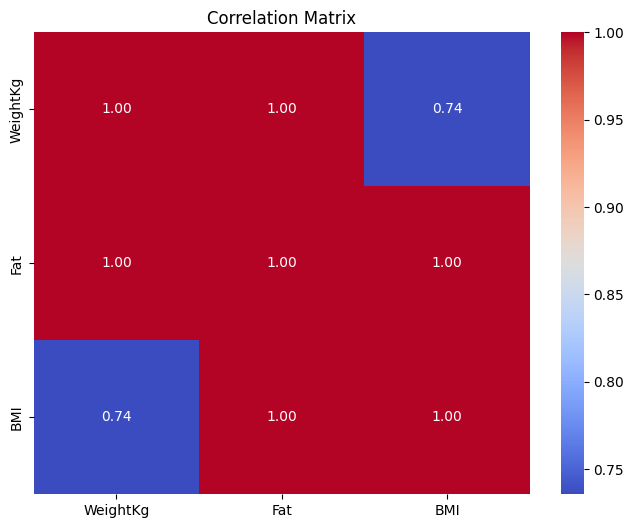

In [31]:
# Correlation analysis with other factors like Fat, BMI, etc.
correlation_matrix = weight_log_data[['WeightKg', 'Fat', 'BMI']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()